In [332]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
import numpy as np
from Allineamento import *

In [376]:
def projectDistZ(x1,x2,y1,y2,d12,z):
    mx = (x2-x1)/d12
    xProj = x1 + mx * z
    
    my = (y2-y1)/d12
    yProj = y1 + my * z
    
    return (xProj, yProj)

def get_theta_angles(x1, y1, x2, y2, d):
    import numpy as np
    thetaX = np.arctan((x2-x1)/d) #rad
    thetaY = np.arctan((y2-y1)/d) #rad
    return (thetaX, thetaY)


def file_loader(runs):
    """
    Load the data file for a given run number.
    """
    from collections.abc import Iterable
    
    if not isinstance(runs, Iterable):
        runs = [runs]

    pos = []
    infos = []
    phs = []
    tmis = []
    evis =[]
    nclus = []
    info_pluss =[]
    bases = []
    for run_number in runs:
        data_path =f'data/TB_T9_2025/run{run_number}.h5'
        print('opening ', data_path)
        pos = []
        phs = []
        tmis =[]
        qtots =[]
        nclus = []
        info_pluss =[]
        xinfos =[]
        with h5py.File(data_path, 'r', libver='latest', swmr=True) as hf:
            # print(hf.keys())
            hf["xpos"].shape
            keys = list(hf.keys())
            pos.append(np.array(hf['xpos']))
            phs.append(np.array(hf['digiPH'])) # from 24
            tmis.append(np.array(hf['digiTime'])) # from 24
            qtots.append(np.array(hf['qtot'])) # from 24
            nclus.append(np.array(hf['nclu'])) # from 24
            info_pluss.append(np.array(hf['info_plus']))
            xinfos.append(np.array(hf['xinfo']))
            #for k in hf.keys():
            #    comand = f'{k} = np.array(hf["{k}"])'
                # print(comand)
            #  exec(comand)
            # print(len(pos))
    xpos = np.concatenate(pos,axis=0)
    ph = np.concatenate(phs,axis=0)
    tm = np.concatenate(tmis,axis=0)
    qtot = np.concatenate(qtots,axis=0)
    nclu = np.concatenate(nclus,axis=0)
    info_plus = np.concatenate(info_pluss,axis=0)
    xinfo = np.concatenate(xinfos,axis=0)
    # print('xpos shape', xpos.shape)
    # print('N spill: ', info_plus[:,0][-1])
    # print(np.unique(xinfo[:,1]))
        # print('xpos shape', xpos.shape)

    xpos[:,2]= xpos[:,2] - offset_x2 
    xpos[:,3]= xpos[:,3] - offset_y2 
    
    x1 = xpos[:,0]
    y1 = xpos[:,1]
    x2 = xpos[:,2] 
    y2 = xpos[:,3] 
    x3 = xpos[:,4]
    y3 = xpos[:,5]


    Calibration = False
    if Calibration:
        q = -25.84
        m = 323.4
        ph[:,2]=  (ph[:,2] - q)/m

    xcry, ycry = projectDistZ(x1,x2,y1,y2,d12,d1c)
    theta_x_in, theta_y_in = get_theta_angles(x1, y1, x2, y2, d12)
    theta_x_out, theta_y_out = get_theta_angles(xcry, ycry, x3, y3, dc3)


    ph_calo_photon = ph[:,2]
    ph_cherry1 = ph[:,0]

    return x1, y1, x2, y2, x3, y3, xcry, ycry, ph_calo_photon, ph_cherry1, \
    theta_x_in, theta_y_in, theta_x_out, theta_y_out, tm, qtot, nclu, info_plus,xinfo


In [364]:
d12 = 330 ## cm
d23 = 66.8
d1c = 330 + 53.2 #cm
dc3 = 10.7 
d1calo = d1c + 779.2 

offset_x2 =   -0.19494474108211143
offset_y2 =   2.276578722633391 

range_chamber = ((0,10),(0,10))
bins2d = (100,100)
mycmap = 'jet'

opt_hist = {'histtype': 'step', 'lw': 1.5, 'alpha': 0.8}
opts_2d = { "cmap" : mycmap, "bins" : bins2d} # "norm" : mpl.colors.LogNorm()}

th_cherry1 = 20
th_cherry2 = 20


opening  data/TB_T9_2025/run730223.h5
1
xpos shape (15092, 8)
730223 -- N spill: 100 -- events: 15092 -- evs/spill: 151
opening  data/TB_T9_2025/run730227.h5
1
xpos shape (21342, 8)
730227 -- N spill: 148 -- events: 21342 -- evs/spill: 144
opening  data/TB_T9_2025/run730228.h5
1
xpos shape (14313, 8)
730228 -- N spill: 99 -- events: 14313 -- evs/spill: 145
opening  data/TB_T9_2025/run730229.h5
1
xpos shape (12873, 8)
730229 -- N spill: 85 -- events: 12873 -- evs/spill: 151
opening  data/TB_T9_2025/run730230.h5
1
xpos shape (40261, 8)
730230 -- N spill: 325 -- events: 40261 -- evs/spill: 124


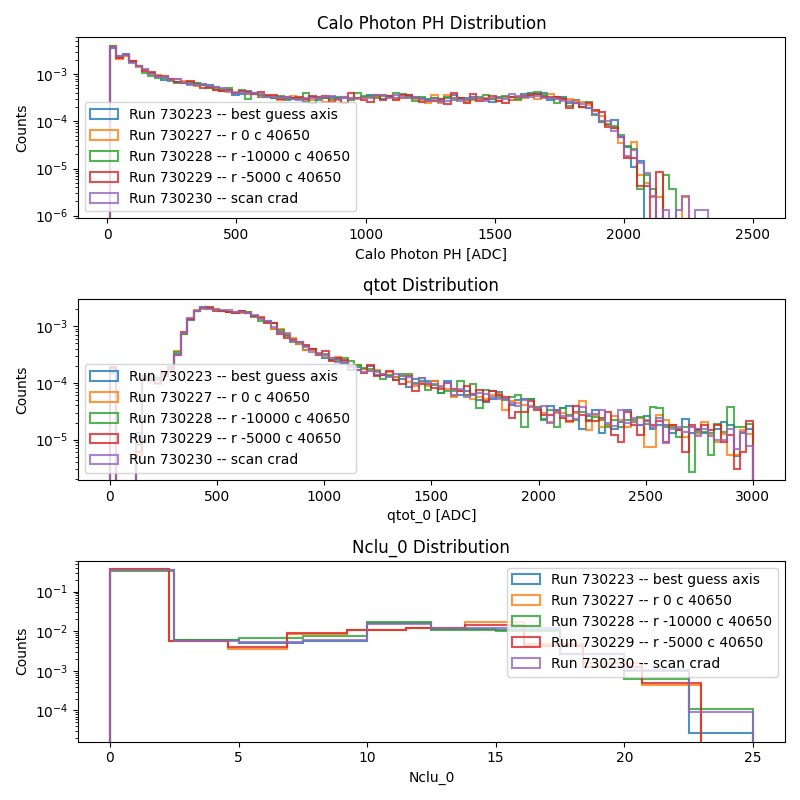

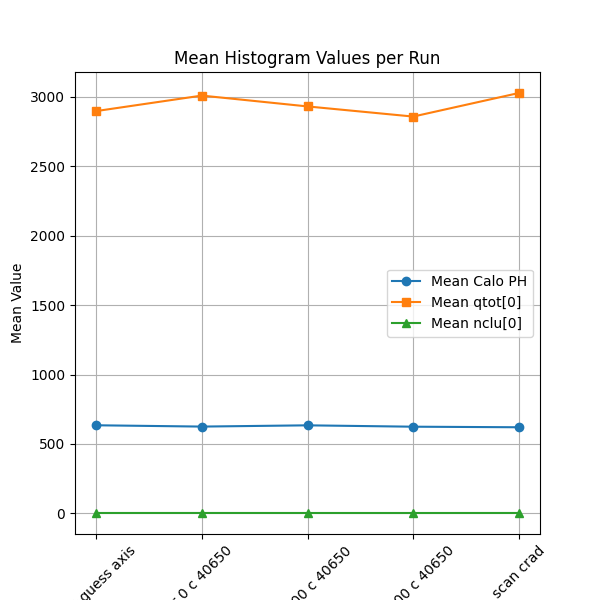

In [365]:
# run_list = [730219,730220,730221,730222, 730160,730161,730218,730178,730179,730180,730181,730226  ]
# labels = [ 'c 30000', 'c 40000', 'c 65000', 'c 0', 'c 20300', 'c 25300',\
#            'r 1500', 'r 12500', 'r 6500', 'r 3200', 'r 9500', 'r 5000' ]
run_list = [730223,730227,730228,730229,730230]# 730224
labels = [ 'best guess axis', 'r 0 c 40650','r -10000 c 40650','r -5000 c 40650', 'scan crad' ]# amorphous

x_cry_cut = [4.6, 4.9]
y_cry_cut = [4.7, 5.15]
if any(run in run_list for run in [730223, 730224,730227, 730225,730228,730229,730230]):
    x_cry_cut = [4.2, 4.5]
    y_cry_cut = [4.7, 5.15]


fig2,ax2 = plt.subplots(1,figsize=(6, 6)) 
fig,ax = plt.subplots(3,figsize=(8, 8)) 

ph_calo_high = 10
ph_calo_low = 500

mean_ph_calo = []
mean_qtot0 = []
mean_nclu0 = []

for i, run_number in enumerate(run_list):
    x1, y1, x2, y2, x3, y3, xcry, ycry, ph_calo_photon, ph_cherry1, \
    theta_x_in, theta_y_in, theta_x_out, theta_y_out, tm, qtot, nclu, info_plus,xinfo = file_loader(run_number)

    logi = ph_cherry1>th_cherry1 & (xcry>x_cry_cut[0]) & (xcry<x_cry_cut[1]) & (ycry>y_cry_cut[0]) & (ycry<y_cry_cut[1])

    ax[0].hist(ph_calo_photon[logi],bins =100 ,range = (10,2500), label =f'Run {run_number} -- {labels[i]}',density= True, **opt_hist)

    ax[1].hist(qtot[:,0][logi],bins =100 ,range = (0,3000), label =f'Run {run_number} -- {labels[i]}',density= True, **opt_hist)
    
    ax[2].hist(nclu[:,0][logi], label =f'Run {run_number} -- {labels[i]}',density= True, **opt_hist)
    
    logi_mean = logi & ((ph_calo_photon > ph_calo_high)) # | (ph_calo_photon < ph_calo_low))
    mean_ph_calo.append(np.mean(ph_calo_photon[logi_mean]))
    mean_qtot0.append(np.mean(qtot[:, 0][logi_mean]))
    mean_nclu0.append(np.mean(nclu[:, 0][logi_mean]))
    print(f'{run_number} -- N spill: {info_plus[:,0][-1]} -- events: {len(ph_calo_photon)} -- evs/spill: {len(ph_calo_photon)/info_plus[:,0][-1]:.0f}')


titles = ['Calo Photon PH Distribution', 'qtot Distribution', 'Nclu_0 Distribution']
xlabels = ['Calo Photon PH [ADC]', 'qtot_0 [ADC]', 'Nclu_0']
for i in range(3):
    ax[i].set_xlabel(xlabels[i])
    ax[i].set_ylabel('Counts')
    ax[i].set_title(titles[i])
    ax[i].legend()
    ax[i].set_yscale('log')

x = np.arange(len(run_list))  # index for each run


ax2.plot(x, mean_ph_calo, 'o-', label='Mean Calo PH')
ax2.plot(x, mean_qtot0, 's-', label='Mean qtot[0]')
ax2.plot(x, mean_nclu0, '^-', label='Mean nclu[0]')

ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=45)
ax2.set_ylabel('Mean Value')
ax2.set_title('Mean Histogram Values per Run')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

730223 -- N spill: 100 -- events: 15092
730227 -- N spill: 148 -- events: 21342
730228 -- N spill: 99 -- events: 14313
730229 -- N spill: 85 -- events: 12873
730230 -- N spill: 328 -- events: 40563


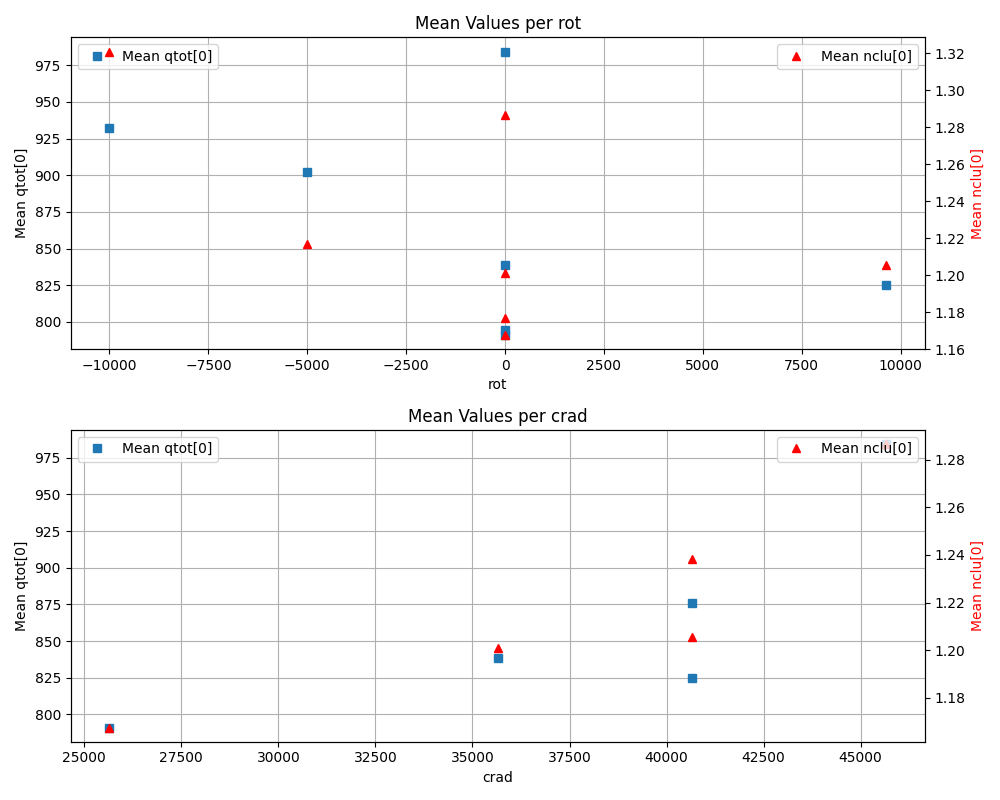

In [371]:
from collections import defaultdict

# Containers per tutte le medie per ogni run e valore di rot/crad
mean_qtot_by_rot = defaultdict(list)
mean_nclu_by_rot = defaultdict(list)

mean_qtot_by_crad = defaultdict(list)
mean_nclu_by_crad = defaultdict(list)

for i, run_number in enumerate(run_list):
    # Carica dati
    x1, y1, x2, y2, x3, y3, xcry, ycry, ph_calo_photon, ph_cherry1, \
    theta_x_in, theta_y_in, theta_x_out, theta_y_out, tm, qtot, nclu, info_plus,xinfo = file_loader(run_number)

    # Correggi parentesi per condizioni booleane
    logi = (ph_cherry1 > th_cherry1) & (xcry > x_cry_cut[0]) & (xcry < x_cry_cut[1]) & (ycry > y_cry_cut[0]) & (ycry < y_cry_cut[1])

    logi_mean = logi & (ph_calo_photon > ph_calo_high)

    # Estrai i valori unici di rot e crad dall'intero xinfo filtrato
    unique_rots = np.unique(xinfo[:,0][logi_mean])
    unique_crads = np.unique(xinfo[:,1][logi_mean])

    # Per ogni valore unico di rot calcolo le medie
    for r in unique_rots:
        mask_rot = (xinfo[:,0] == r) & logi_mean
        mean_qtot_by_rot[r].append(np.mean(qtot[:,0][mask_rot]))
        mean_nclu_by_rot[r].append(np.mean(nclu[:,0][mask_rot]))

    # Per ogni valore unico di crad calcolo le medie
    for c in unique_crads:
        mask_crad = (xinfo[:,1] == c) & logi_mean
        mean_qtot_by_crad[c].append(np.mean(qtot[:,0][mask_crad]))
        mean_nclu_by_crad[c].append(np.mean(nclu[:,0][mask_crad]))

    print(f'{run_number} -- N spill: {info_plus[:,0][-1]} -- events: {len(ph_calo_photon)}')

# Ora puoi fare un plot aggregato per rot e crad:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Per rot
rots_sorted = sorted(mean_qtot_by_rot.keys())
mean_qtot_rot_avg = [np.mean(mean_qtot_by_rot[r]) for r in rots_sorted]
mean_nclu_rot_avg = [np.mean(mean_nclu_by_rot[r]) for r in rots_sorted]

ax[0].plot(rots_sorted, mean_qtot_rot_avg, 's', label='Mean qtot[0]')
ax[0].set_xlabel('rot')
ax[0].set_ylabel('Mean qtot[0]')
ax0b = ax[0].twinx()
ax0b.plot(rots_sorted, mean_nclu_rot_avg, '^', color='r', label='Mean nclu[0]')
ax0b.set_ylabel('Mean nclu[0]', color='r')
ax[0].set_title('Mean Values per rot')
ax[0].legend(loc='upper left')
ax0b.legend(loc='upper right')
ax[0].grid(True)

# Per crad
crads_sorted = sorted(mean_qtot_by_crad.keys())
mean_qtot_crad_avg = [np.mean(mean_qtot_by_crad[c]) for c in crads_sorted]
mean_nclu_crad_avg = [np.mean(mean_nclu_by_crad[c]) for c in crads_sorted]

ax[1].plot(crads_sorted, mean_qtot_crad_avg, 's', label='Mean qtot[0]')
ax[1].set_xlabel('crad')
ax[1].set_ylabel('Mean qtot[0]')
ax1b = ax[1].twinx()
ax1b.plot(crads_sorted, mean_nclu_crad_avg, '^', color='r', label='Mean nclu[0]')
ax1b.set_ylabel('Mean nclu[0]', color='r')
ax[1].set_title('Mean Values per crad')
ax[1].legend(loc='upper left')
ax1b.legend(loc='upper right')
ax[1].grid(True)

plt.tight_layout()
plt.show()


## code for a scan (to be optimized for theta in )

opening  data/TB_T9_2025/run730230.h5
[25650.055 35650.098 45649.965 55650.   ]
opening  data/TB_T9_2025/run730223.h5
[40648.723]


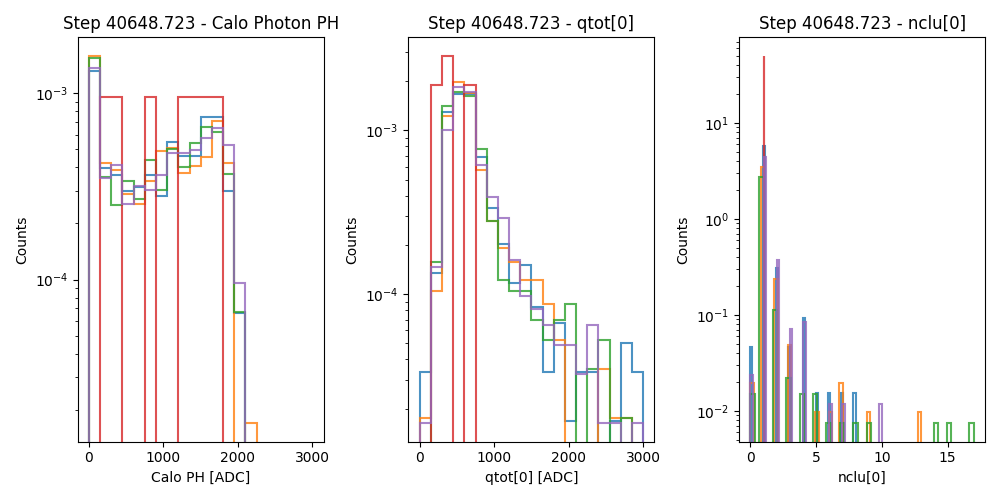

In [386]:
scan_number = [730230,730223]

isrot = False
iscrad = True

fig, axs = plt.subplots(1, 3, figsize=(10,5))
for run in scan_number:
    # Caricamento dei dati (assumendo 1 solo run)
    x1, y1, x2, y2, x3, y3, xcry, ycry, ph_calo_photon, ph_cherry1, \
    theta_x_in, theta_y_in, theta_x_out, theta_y_out, tm, qtot, nclu, info_plus,xinfo = file_loader(run)

    if iscrad:
        scan_angle = xinfo[:,1]
    else:
        scan_angle = xinfo[:,0]

    unique_steps = np.unique(scan_angle)
    print(unique_steps)
    n_steps = len(unique_steps)


    for i, step in enumerate(unique_steps):
        logi = (ph_cherry1 > th_cherry1) & (scan_angle == step) & (xcry>x_cry_cut[0]) & (xcry<x_cry_cut[1]) & (ycry>y_cry_cut[0]) & (ycry<y_cry_cut[1])
            

        if np.sum(logi) == 0:
            continue

        axs[0].hist(ph_calo_photon[logi], bins=20, range=(0, 3000), label=f'Step {step}', density=True, **opt_hist)
        axs[1].hist(qtot[:, 0][logi], bins=20, range=(0, 3000), label=f'Step {step}', density=True, **opt_hist)
        axs[2].hist(nclu[:, 0][logi], bins=50, label=f'Step {step}', density=True, **opt_hist)

        axs[0].set_title(f'Step {step} - Calo Photon PH')
        axs[1].set_title(f'Step {step} - qtot[0]')
        axs[2].set_title(f'Step {step} - nclu[0]')

        for j in range(3):
            axs[j].set_yscale('log')
            # axs[j].legend()
            axs[j].set_xlabel(['Calo PH [ADC]', 'qtot[0] [ADC]', 'nclu[0]'][j])
            axs[j].set_ylabel('Counts')

plt.tight_layout()
plt.show()


opening  data/TB_T9_2025/run730230.h5
opening  data/TB_T9_2025/run730223.h5


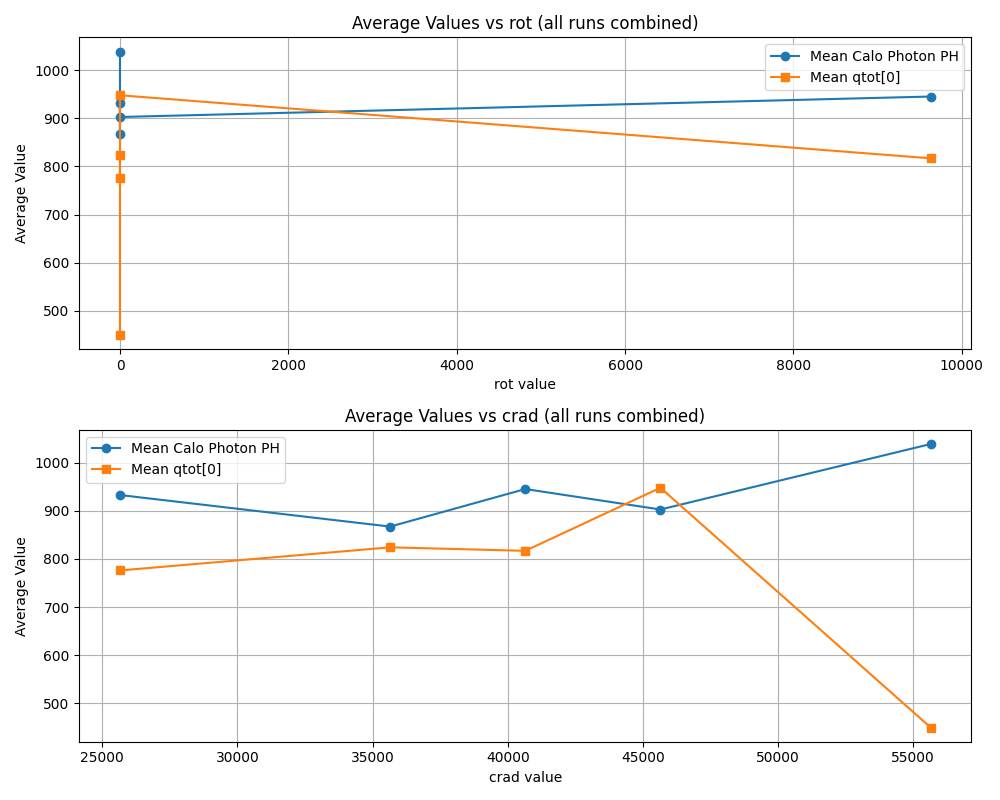

In [387]:
# Dizionari per accumulare dati per rot e crad
ph_calo_rot = {}
qtot0_rot = {}

ph_calo_crad = {}
qtot0_crad = {}

for run in scan_number:
    x1, y1, x2, y2, x3, y3, xcry, ycry, ph_calo_photon, ph_cherry1, \
    theta_x_in, theta_y_in, theta_x_out, theta_y_out, tm, qtot, nclu, info_plus, xinfo = file_loader(run)

    rots = np.unique(xinfo[:, 0])
    crads = np.unique(xinfo[:, 1])

    for rot in rots:
        logi_rot = (ph_cherry1 > th_cherry1) & (xinfo[:, 0] == rot) & \
                   (xcry > x_cry_cut[0]) & (xcry < x_cry_cut[1]) & \
                   (ycry > y_cry_cut[0]) & (ycry < y_cry_cut[1])
        if np.sum(logi_rot) == 0:
            continue
        ph = ph_calo_photon[logi_rot]
        qt = qtot[:, 0][logi_rot]

        ph_calo_rot.setdefault(rot, []).extend(ph)
        qtot0_rot.setdefault(rot, []).extend(qt)

    for crad in crads:
        logi_crad = (ph_cherry1 > th_cherry1) & (xinfo[:, 1] == crad) & \
                    (xcry > x_cry_cut[0]) & (xcry < x_cry_cut[1]) & \
                    (ycry > y_cry_cut[0]) & (ycry < y_cry_cut[1])
        if np.sum(logi_crad) == 0:
            continue
        ph = ph_calo_photon[logi_crad]
        qt = qtot[:, 0][logi_crad]

        ph_calo_crad.setdefault(crad, []).extend(ph)
        qtot0_crad.setdefault(crad, []).extend(qt)

# Calcolo medie
all_rots = np.array(sorted(ph_calo_rot.keys()))
mean_ph_calo_rot = np.array([np.mean(ph_calo_rot[r]) for r in all_rots])
mean_qtot0_rot = np.array([np.mean(qtot0_rot[r]) for r in all_rots])

all_crads = np.array(sorted(ph_calo_crad.keys()))
mean_ph_calo_crad = np.array([np.mean(ph_calo_crad[c]) for c in all_crads])
mean_qtot0_crad = np.array([np.mean(qtot0_crad[c]) for c in all_crads])

# Plot unico con 2 subplot
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=False)

# Rot
axs[0].plot(all_rots, mean_ph_calo_rot, 'o-', label='Mean Calo Photon PH')
axs[0].plot(all_rots, mean_qtot0_rot, 's-', label='Mean qtot[0]')
axs[0].set_xlabel('rot value')
axs[0].set_ylabel('Average Value')
axs[0].set_title('Average Values vs rot (all runs combined)')
axs[0].legend()
axs[0].grid(True)

# Crad
axs[1].plot(all_crads, mean_ph_calo_crad, 'o-', label='Mean Calo Photon PH')
axs[1].plot(all_crads, mean_qtot0_crad, 's-', label='Mean qtot[0]')
axs[1].set_xlabel('crad value')
axs[1].set_ylabel('Average Value')
axs[1].set_title('Average Values vs crad (all runs combined)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


opening  data/TB_T9_2025/run730230.h5
opening  data/TB_T9_2025/run730223.h5


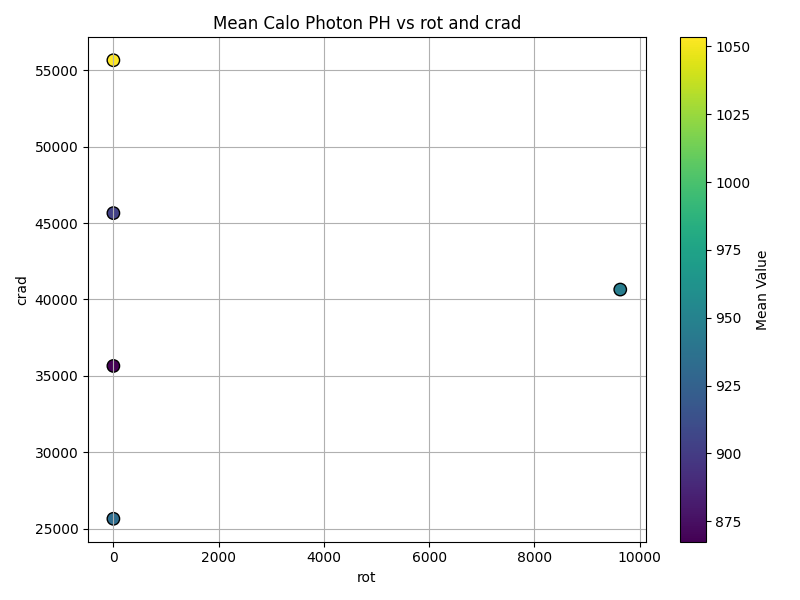

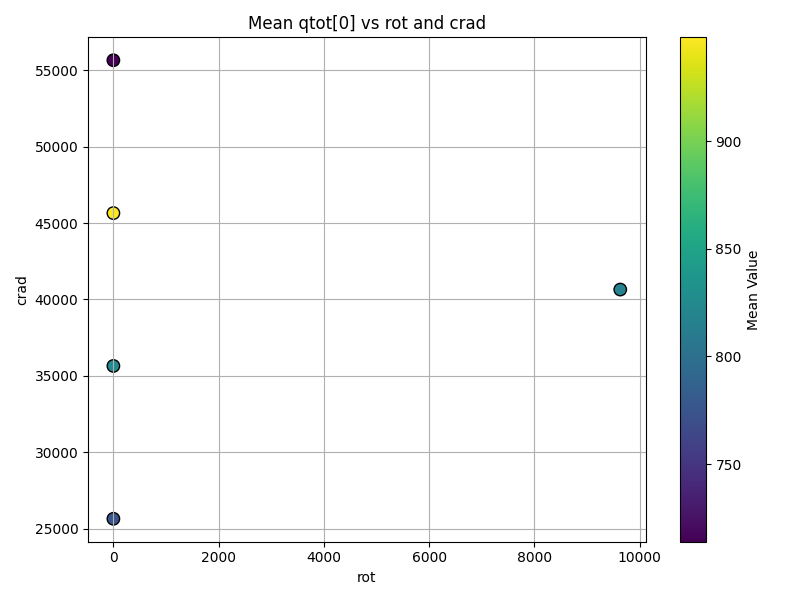

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dizionari per accumulare dati (lista di valori) per coppie (rot, crad)
ph_calo_map = {}
qtot0_map = {}

for run in scan_number:
    x1, y1, x2, y2, x3, y3, xcry, ycry, ph_calo_photon, ph_cherry1, \
    theta_x_in, theta_y_in, theta_x_out, theta_y_out, tm, qtot, nclu, info_plus, xinfo = file_loader(run)

    rots = np.unique(xinfo[:, 0])
    crads = np.unique(xinfo[:, 1])

    for rot in rots:
        for crad in crads:
            logi = (ph_cherry1 > th_cherry1) & (xinfo[:, 0] == rot) & (xinfo[:, 1] == crad) & \
                   (xcry > x_cry_cut[0]) & (xcry < x_cry_cut[1]) & (ycry > y_cry_cut[0]) & (ycry < y_cry_cut[1])
            if np.sum(logi) == 0:
                continue

            ph = ph_calo_photon[logi]
            qt = qtot[:, 0][logi]

            key = (rot, crad)
            if key not in ph_calo_map:
                ph_calo_map[key] = []
                qtot0_map[key] = []

            ph_calo_map[key].extend(ph)
            qtot0_map[key].extend(qt)

# Ora calcoliamo le medie per ogni (rot, crad)
points = list(ph_calo_map.keys())
rots_vals = np.array([p[0] for p in points])
crads_vals = np.array([p[1] for p in points])

mean_ph_calo_vals = np.array([np.mean(ph_calo_map[p]) for p in points])
mean_qtot0_vals = np.array([np.mean(qtot0_map[p]) for p in points])

# Funzione per scatter plot con colorbar
def plot_scatter_heatmap(x, y, z, title, xlabel='rot', ylabel='crad'):
    plt.figure(figsize=(8,6))
    sc = plt.scatter(x, y, c=z, cmap='jet', s=80, edgecolor='k')
    plt.colorbar(sc, label='Mean Value')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot per media ph_calo
plot_scatter_heatmap(rots_vals, crads_vals, mean_ph_calo_vals, 'Mean Calo Photon PH vs rot and crad')

# Plot per media qtot[0]
plot_scatter_heatmap(rots_vals, crads_vals, mean_qtot0_vals, 'Mean qtot[0] vs rot and crad')
